In [ ]:
#multi-class output classification with 10 desired outputs for 0 to 9
#Images are 28x28 thus imput layer has 784 nodes
#weights and biases are 784*128+128
#Hidden layer has 128 nodes
#weights and biases 128*10+10
#Output layer has 10 nodes

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten

In [2]:
(x_train,y_train),(x_test,y_test)=keras.datasets.mnist.load_data()
#existing dataset in tensorflow mnist digit classification dataset

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
x_train #has all the data points from dataset images as vectors of pixels

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [4]:
x_train.shape
#60000 images
#each image of 28x28 pixel stored as a np.array

(60000, 28, 28)

In [5]:
x_test.shape
#test images

(10000, 28, 28)

In [8]:
y_train
#has labels of the trained data

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [9]:
y_train.shape

(60000,)

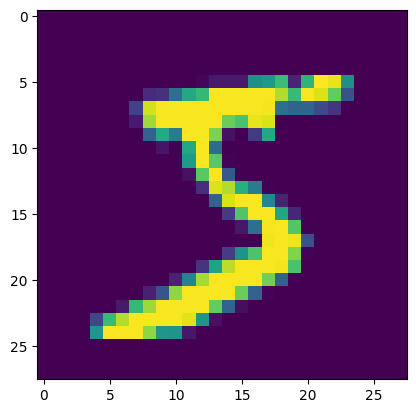

In [12]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0])
#The first image in training set

In [13]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 170,
        253, 253, 253, 253, 253, 225, 172, 253, 242, 195,  64,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  49, 238, 253, 253, 253, 253,
        253, 253, 253, 253, 251,  93,  82,  82,  56,  39,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  18, 219, 253, 253, 253, 253,
        253, 198, 182, 247, 241,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  80, 156, 107, 253, 253,
        205,  11,   0,  43, 154,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  14,   1, 154, 253,
         90,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 139, 253,
        190,   2,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  11, 190,
        253,  70,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  35,
        241, 225, 160, 108,   1,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         81, 240, 253, 253, 119,  25,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  45, 186, 253, 253, 150,  27,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  16,  93, 252, 253, 187,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 249, 253, 249,  64,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  46, 130, 183, 253, 253, 207,   2,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  39,
        148, 229, 253, 253, 253, 250, 182,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  24, 114, 221,
        253, 253, 253, 253, 201,  78,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  23,  66, 213, 253, 253,
        253, 253, 198,  81,   2,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  18, 171, 219, 253, 253, 253, 253,
        195,  80,   9,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,  55, 172, 226, 253, 253, 253, 253, 244, 133,
         11,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0, 136, 253, 25

In [16]:
#must put values in [0,1] of values of the array to improve convergence
#divide by max.value 255 to get values within [0,1]
x_train=x_train/255
x_test=x_test/255
x_train[0]

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000

In [36]:
model=Sequential()
#flatten to convert 2d 28x28 images to 1d vectoe of 1x784
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128,activation='relu'))
#add a hidden layer with 128 nodes and activation function as relu as its most used
model.add(Dense(32,activation='relu'))#adding another layer to increase efficiency
model.add(Dense(10,activation='softmax'))
#output layer with 10 neurons/nodes and activation function as softmax
#softmax is used when multiple class classification is used

In [38]:
model.summary()
#trainable parameters bw input and hidden layer is 784*128+128=100480
#trainable parameters bw hidden layer and output layer is 32*10+10=1290


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               100480    
                                                                 
 dense_3 (Dense)             (None, 32)                4128      
                                                                 
 dense_4 (Dense)             (None, 10)                330       
                                                                 
Total params: 104938 (409.91 KB)
Trainable params: 104938 (409.91 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [46]:
model.compile(loss='sparse_categorical_crossentropy' ,optimizer='Adam',metrics=['accuracy'])
#compiling the model with specific loss and optimizer functions
#track the accuracy while compiling

In [64]:
history = model.fit(x_train,y_train,epochs=23,validation_split=0.2)
#training the model where it learns the classifications
#validation split of 20%
#notice the loss decreses
#val_accuracy -> validation accuracy

Epoch 1/23
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0430 - accuracy: 0.9876 - val_loss: 0.1052 - val_accuracy: 0.9712
Epoch 2/23
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0404 - accuracy: 0.9883 - val_loss: 0.1094 - val_accuracy: 0.9683
Epoch 3/23
1500/1500 [==============================] - 7s 4ms/step - loss: 0.0393 - accuracy: 0.9888 - val_loss: 0.1043 - val_accuracy: 0.9730
Epoch 4/23
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0370 - accuracy: 0.9897 - val_loss: 0.1053 - val_accuracy: 0.9720
Epoch 5/23
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0367 - accuracy: 0.9894 - val_loss: 0.1039 - val_accuracy: 0.9728
Epoch 6/23
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0341 - accuracy: 0.9902 - val_loss: 0.1034 - val_accuracy: 0.9734
Epoch 7/23
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0329 - accuracy: 0.9909 - val_loss: 0.1028 - val_accuracy:

In [65]:
#predicting
y_prob=model.predict(x_test)
#gives the probability of the image being 0 to 9 in an array i.e probabilty of it can be 0 or 1 .... or 9

313/313 [==============================] - 1s 2ms/step


In [66]:
#should get max probabilty value from each array to get the digit in that image
y_pred=y_prob.argmax(axis=1)

In [67]:
y_prob

array([[4.90665191e-12, 1.28920999e-10, 3.45249646e-07, ...,
        9.99998748e-01, 2.25708230e-10, 1.30884672e-08],
       [1.05599329e-12, 4.69698307e-06, 9.99995053e-01, ...,
        2.47892212e-16, 1.78272137e-11, 1.50038373e-18],
       [2.95022947e-12, 9.99512732e-01, 6.31838848e-05, ...,
        2.92981567e-04, 9.97664101e-05, 1.74618400e-08],
       ...,
       [2.87108392e-24, 1.49567536e-14, 5.94619247e-17, ...,
        3.69731179e-09, 3.66956243e-08, 4.57038732e-06],
       [4.24751617e-14, 1.44834231e-11, 7.97963746e-13, ...,
        4.47478805e-13, 8.76395177e-07, 1.81341961e-14],
       [1.55362126e-10, 5.55226793e-15, 6.06667772e-10, ...,
        1.01065515e-19, 5.12198747e-12, 2.15050972e-15]], dtype=float32)

In [68]:
y_pred

array([7, 2, 1, ..., 4, 5, 6])

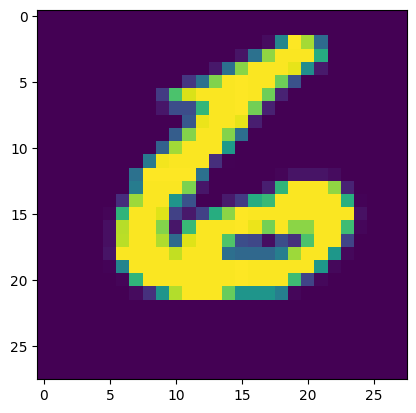

In [76]:
plt.imshow(x_test[9999])

In [77]:
#to get the accuracy of predictions
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)
#y_test has the actual values
#increase no.of epochs or/and hidden layers to improve accuracy
#stop the no.of epochs once lowest loss if reached

0.9722

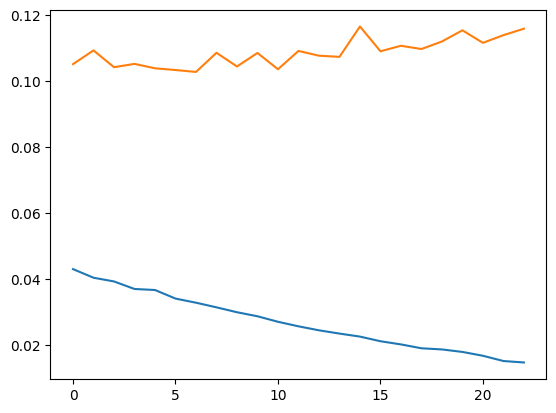

In [78]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

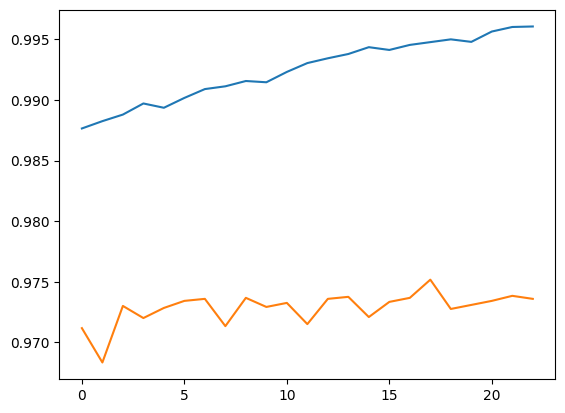

In [79]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

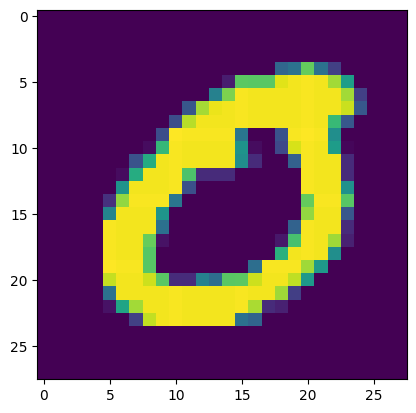

In [86]:
#testing predictions by seeing the value in x_test and predict it via the model
plt.imshow(x_test[997])

In [81]:
model.predict(x_test[599].reshape(1,28,28))
#reshape says that only 1 image

1/1 [==============================] - 0s 29ms/step


array([[6.3306666e-15, 1.2852064e-15, 1.2148593e-10, 9.8784636e-05,
        2.9842265e-10, 7.8446504e-07, 9.2529251e-18, 1.9699972e-07,
        1.0818089e-05, 9.9988937e-01]], dtype=float32)

In [85]:
model.predict(x_test[997].reshape(1,28,28)).argmax(axis=1)

1/1 [==============================] - 0s 21ms/step


array([0])